In [1]:
import pandas as pd
import datetime
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import ast
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import linear_kernel
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df_movies= pd.read_csv('./dataset_csv/movies_dataset.csv')
df_movies.head()

In [ ]:
df_movies.columns

In [ ]:
df_movies.info()

In [ ]:
df_movies[df_movies['release_date'].isnull()]

In [8]:
df_movies.dropna(subset = ['release_date'], inplace = True )

In [10]:
df_movies = df_movies.drop(['video','imdb_id','adult','original_title','poster_path', 'homepage'], axis =1)


In [ ]:
df_movies.info()

Relación entre el revenue total y la cantidad de peliculas que realizó cada Productora

In [3]:
# Cargar el DataFrame desde el archivo 'pq_prodCo.parquet'
df_prodCo = pd.read_parquet('datasets/pq_prodCo.parquet')

# Calcular la correlación entre las columnas
correlation = df_prodCo['total_revenue'].corr(df_prodCo['total_movies'])

# Realizar un análisis
if correlation > 0:
    analysis = "Existe una correlación positiva entre Total Revenue y Total Movies."
elif correlation < 0:
    analysis = "Existe una correlación negativa entre Total Revenue y Total Movies."
else:
    analysis = "No parece haber una correlación clara entre Total Revenue y Total Movies."


In [5]:
correlation

0.9201509266818522

In [4]:

analysis

'Existe una correlación positiva entre Total Revenue y Total Movies.'

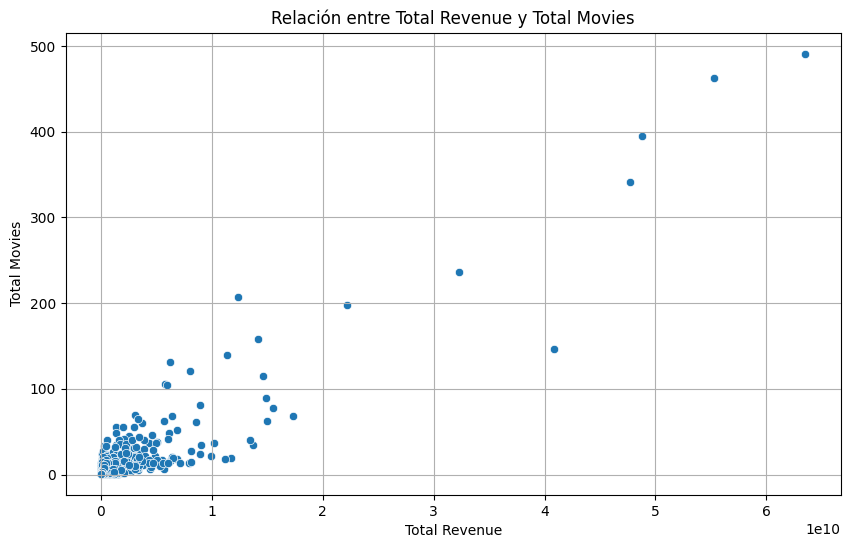

In [6]:
# Crear una gráfica de dispersión utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_revenue', y='total_movies', data=df_prodCo)
plt.title('Relación entre Total Revenue y Total Movies')
plt.xlabel('Total Revenue')
plt.ylabel('Total Movies')
plt.grid(True)
plt.show()

In [16]:
#Se guarda como un archivo PNG en la carpeta "images".
plt.savefig('images/scatterplot_prod.png')

<Figure size 640x480 with 0 Axes>

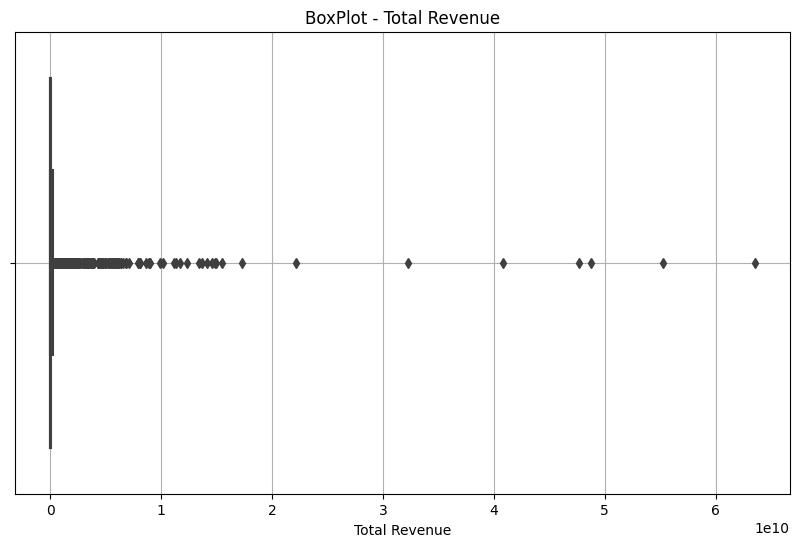

In [8]:
# Crear un boxplot para visualizar los datos y detectar valores atípicos
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_prodCo['total_revenue'])
plt.title('BoxPlot - Total Revenue')
plt.xlabel('Total Revenue')
plt.grid(True)
plt.show()

In [9]:
#Se guarda como un archivo PNG en la carpeta "images".
plt.savefig('images/boxplot_prod.png')

<Figure size 640x480 with 0 Axes>

In [10]:
# Calcular los cuartiles
Q1 = df_prodCo['total_revenue'].quantile(0.25)
Q3 = df_prodCo['total_revenue'].quantile(0.75)

# Calcular el rango intercuartílico
IQR = Q3 - Q1

# Definir límites para identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos para eliminar los valores atípicos
df_no_outliers = df_prodCo[(df_prodCo['total_revenue'] >= lower_bound) & (df_prodCo['total_revenue'] <= upper_bound)]


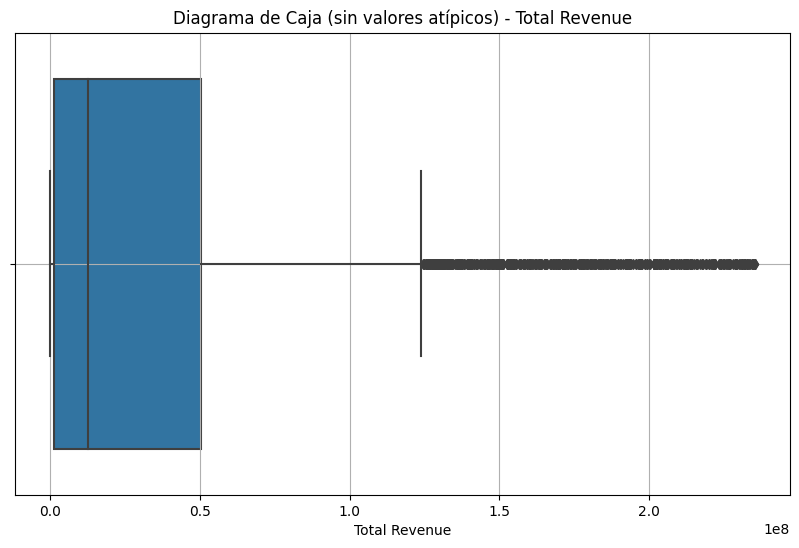

In [11]:
# Crear un nuevo boxplot para los datos sin valores atípicos
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_outliers['total_revenue'])
plt.title('Diagrama de Caja (sin valores atípicos) - Total Revenue')
plt.xlabel('Total Revenue')
plt.grid(True)
plt.show()

In [12]:
#Se guarda como un archivo PNG en la carpeta "images".
plt.savefig('images/boxplotNoOutliers_prod.png')

<Figure size 640x480 with 0 Axes>

In [13]:
# Calcular la correlación entre las columnas para los datos sin valores atípicos
correlation = df_no_outliers['total_revenue'].corr(df_no_outliers['total_movies'])

# Realizar un análisis
if correlation > 0:
    analysis = "Existe una correlación sin Outliers positiva entre Total Revenue y Total Movies."
elif correlation < 0:
    analysis = "Existe una correlación sin Outliers negativa entre Total Revenue y Total Movies."
else:
    analysis = "No parece haber una correlación clara entre Total Revenue y Total Movies."
    

In [14]:
correlation


0.35243957595081654

In [15]:
analysis

'Existe una correlación sin Outliers positiva entre Total Revenue y Total Movies.'

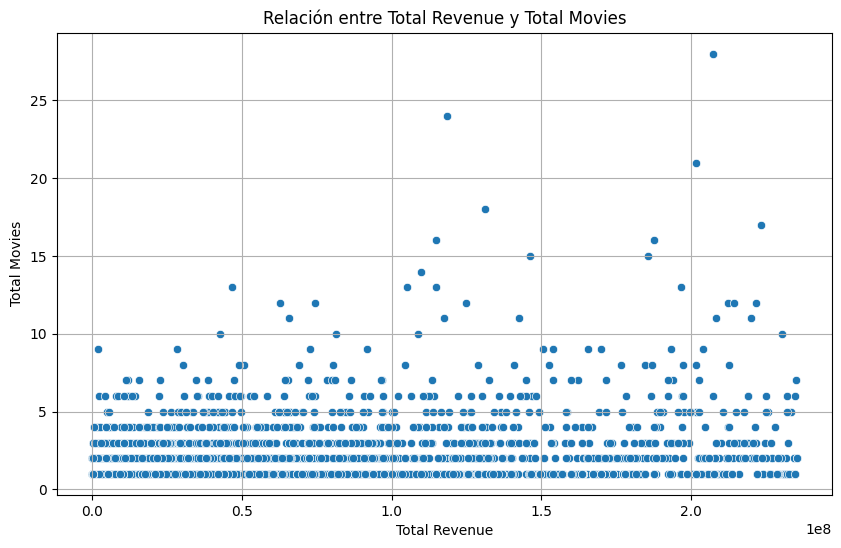

In [17]:
# Crear una gráfica de dispersión utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_revenue', y='total_movies', data=df_no_outliers)
plt.title('Relación entre Total Revenue y Total Movies')
plt.xlabel('Total Revenue')
plt.ylabel('Total Movies')
plt.grid(True)
plt.show()

In [18]:
#Se guarda como un archivo PNG en la carpeta "images".
plt.savefig('images/scatterplotNoOutliers_prod.png')

<Figure size 640x480 with 0 Axes>

WordCloud

In [19]:
#Se pasan las columnas de object a str 
df_movies['title'] = df_movies['title'].astype('str')
df_movies['overview'] = df_movies['overview'].astype('str')


In [20]:
#Se unen los valores de las columnas en una sola cadena de texto
title_corpus = ' '.join(df_movies['title'])
overview_corpus = ' '.join(df_movies['overview'])

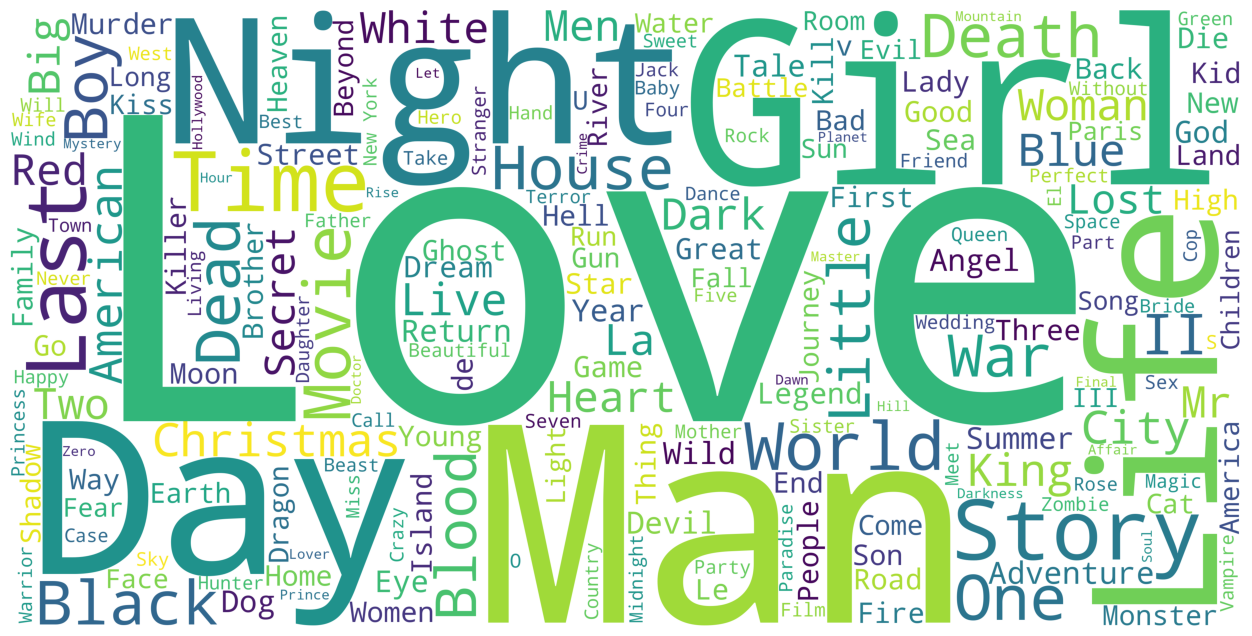

In [21]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [22]:
title_wordcloud.to_file('images/title_wordcloud.png')

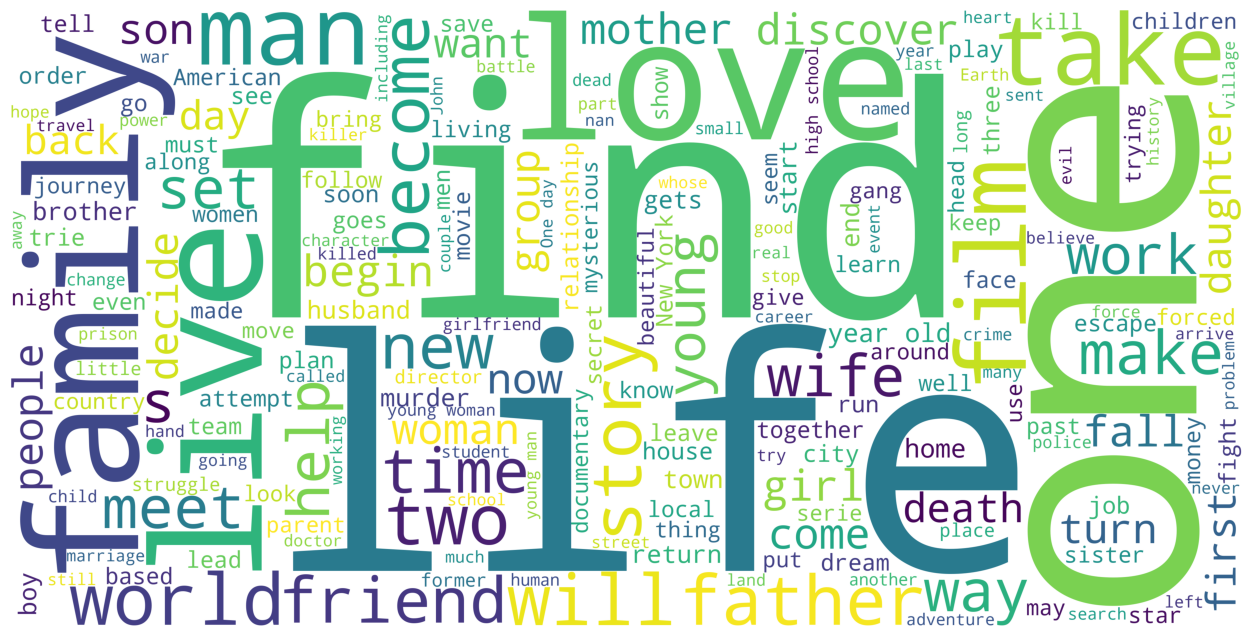

In [23]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

In [24]:
overview_wordcloud.to_file('images/overview_wordcloud.png')

Revenue/Budget = Return

In [17]:
# Calcula la cantidad de valores NaN en las columnas "revenue" y "budget"
cantidad_nan_revenue = df_movies['revenue'].isnull().sum()
cantidad_nan_budget = df_movies['budget'].isnull().sum()

print("Cantidad de valores NaN en la columna 'revenue':", cantidad_nan_revenue)
print("Cantidad de valores NaN en la columna 'budget':", cantidad_nan_budget)

Cantidad de valores NaN en la columna 'revenue': 3
Cantidad de valores NaN en la columna 'budget': 0


In [18]:
#reemplazo de nulos y creacion columna[return]
df_movies['revenue']= df_movies['revenue'].replace(0, np.nan)
df_movies['budget']= pd.to_numeric(df_movies['budget'], errors = 'coerce')
df_movies['budget']= df_movies['budget'].replace(0, np.nan)

df_movies['return']= df_movies['revenue']/df_movies['budget']

print(df_movies[df_movies['return'].isnull()].shape)
print(df_movies[df_movies['budget'].isnull()].shape)

(39998, 19)
(36493, 19)


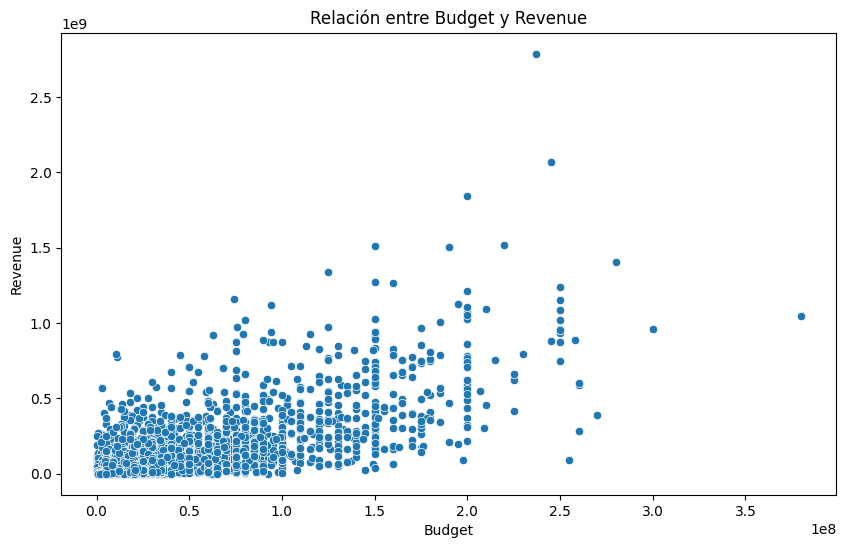

In [31]:
# Grafica relación entre budget y revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_movies, x='budget', y='revenue')
plt.title('Relación entre Budget y Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

In [19]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45379 entries, 0 to 45465
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4491 non-null   object 
 1   budget                 8886 non-null   float64
 2   genres                 45379 non-null  object 
 3   id                     45379 non-null  object 
 4   original_language      45368 non-null  object 
 5   overview               45379 non-null  object 
 6   popularity             45377 non-null  object 
 7   production_companies   45379 non-null  object 
 8   production_countries   45379 non-null  object 
 9   release_date           45379 non-null  object 
 10  revenue                7407 non-null   float64
 11  runtime                45130 non-null  float64
 12  spoken_languages       45376 non-null  object 
 13  status                 45296 non-null  object 
 14  tagline                20398 non-null  object 
 15  title  

In [20]:
# Se crea column Year
df_movies['year'] = pd.to_datetime(df_movies['release_date'], errors= 'coerce').apply(lambda x: str(x).split(' ')[0] if x != np.nan else np.nan)

Analisis dataset Credits 

In [21]:
credits_df = pd.read_csv('./dataset_csv/credits.csv')
credits_df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


Merge movies + credits

In [24]:
# Se procesa columna id en movies
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan
    
df_movies['id'] = df_movies['id'].apply(convert_int) 

In [25]:
df_movies[df_movies['id'].isnull()]

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,return,year
19730,0.065736,NaN,"[{'name': 'Carousel Productions', 'id': 11176}...",NaN,104.0,Released,NaN,False,6.0,1,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaT
29503,1.931659,NaN,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...",NaN,68.0,Released,NaN,False,7.0,12,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaT
35587,2.185485,NaN,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...",NaN,82.0,Released,Beware Of Frost Bites,False,4.3,22,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaT


In [26]:
df_movies = df_movies.drop([19730, 29503, 35587])
df_movies['id'] = df_movies['id'].astype('int')

In [27]:
mov_cred = movies_metadata.merge(credits_df, on = 'id')
mov_cred.shape

(45451, 20)

In [28]:
mov_cred.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew'],
      dtype='object')

In [29]:
# Se convierte cadenas que representan listas en objetos de listas reales
# cast y crew desanidadas para utilizar sus datos
mov_cred['cast'] = mov_cred['cast'].apply(ast.literal_eval)  
mov_cred['crew'] = mov_cred['crew'].apply(ast.literal_eval)  

In [90]:
mov_cred['cast_size'] = mov_cred['cast'].apply(lambda x: len(x))  
mov_cred['crew_size'] = mov_cred['crew'].apply(lambda x: len(x))  